     user_id  item_id  interaction_count  region  experience_years_experience
0    1019917  2470649                  1     1.0                          7.0
1    1041106  2470649                  1     2.0                          4.0
2    1058482  2470649                  1     0.0                          6.0
3    1069584  2470649                  1     6.0                          7.0
4    1084518  2470649                  1     0.0                          7.0
..       ...      ...                ...     ...                          ...
154   914883  2470649                  1     0.0                          4.0
155   922851  2470649                  1     0.0                          4.0
156   960648  2470649                  3     0.0                          7.0
157   985216  2470649                  1     6.0                          7.0
158    98683  2470649                  1     7.0                          0.0

[159 rows x 5 columns]
Προτάσεις για τη θέση εργασίας με item_i

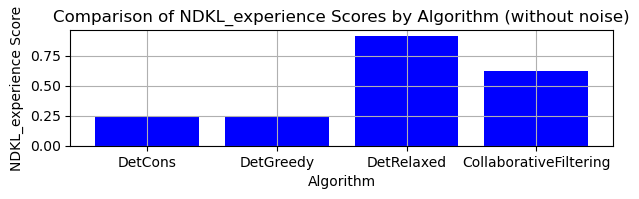

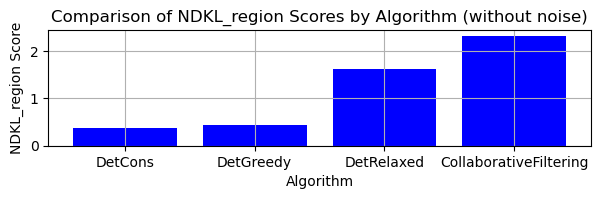

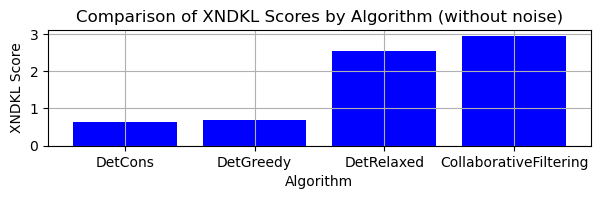

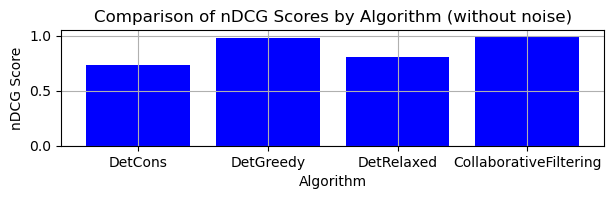

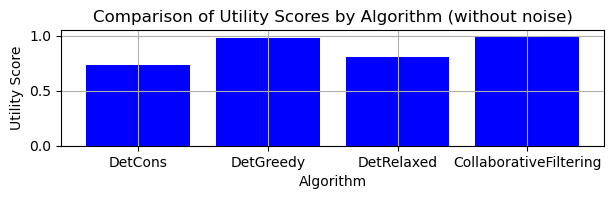

Evaluating for noise level: low
Evaluating for noise level: medium
Evaluating for noise level: high

Results for noise level = low
DetCons:
  NDKL_experience: 0.3785026430329554
  MinSkew_experience: 0.4351871875445851
  MaxSkew_experience: 3.268347402694109
  nDCG: 0.7025611993036401
  Utility: 0.7025611993036402
  MinRep_experience: 24
  MaxRep_experience: 256
  NDKL_region: 0.7155470071940933
  MinSkew_region: 0.7674820283665483
  MaxSkew_region: 4.967139144112585
  MinRep_region: 0.0
  MaxRep_region: 391
  NDKL_combined: 2.5699066637724584
  MinSkew_combined: 2.5699066637724584
  MaxSkew_combined: 6.601629655271808
  MinRep_combined: 0.0
  MaxRep_combined: 0.0
  XNDKL: 1.0940496502270487
DetGreedy:
  NDKL_experience: 0.20511107633827533
  MinSkew_experience: 0.27254367605659857
  MaxSkew_experience: 1.8111995678485702
  nDCG: 0.9691049663985561
  Utility: 0.9691049663985559
  MinRep_experience: 0.0
  MaxRep_experience: 394
  NDKL_region: 0.3721740845766606
  MinSkew_region: 0.42983

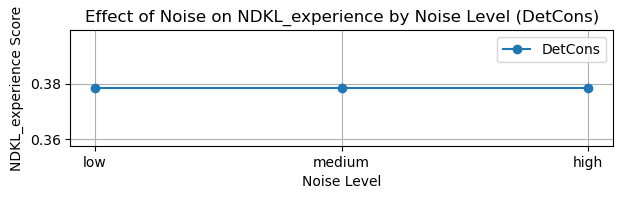

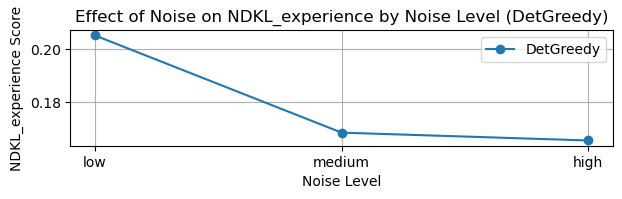

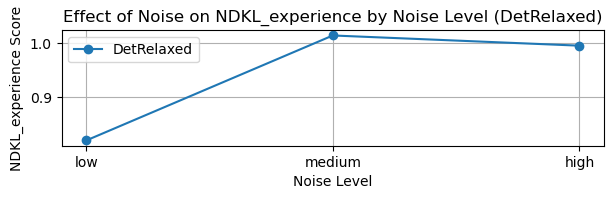

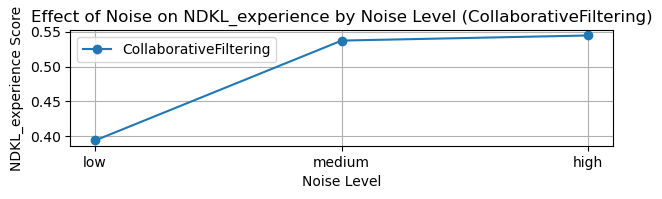

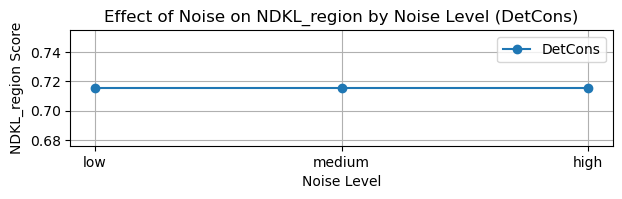

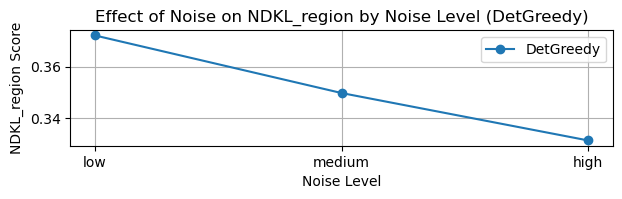

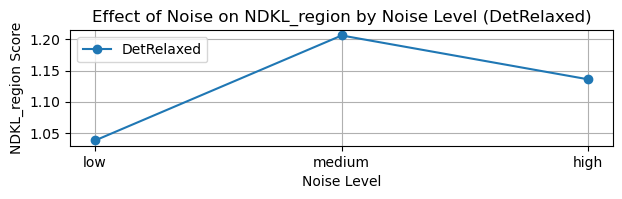

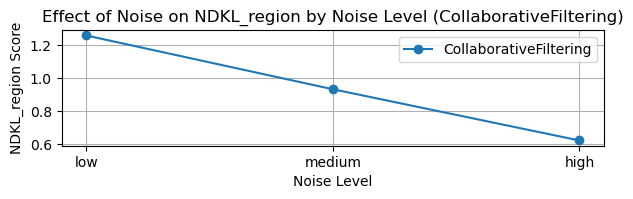

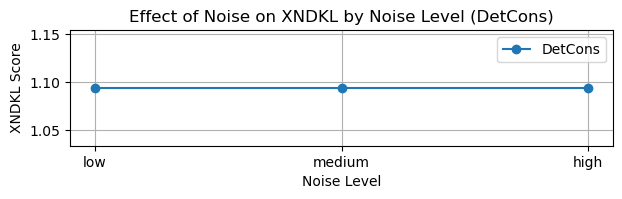

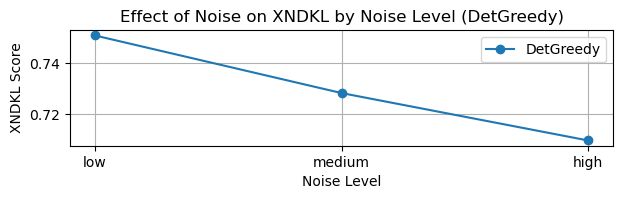

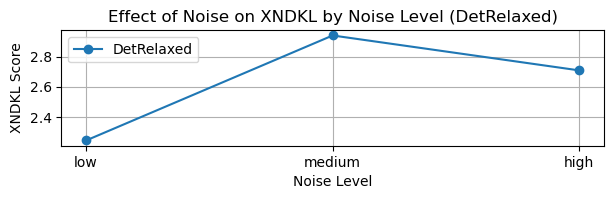

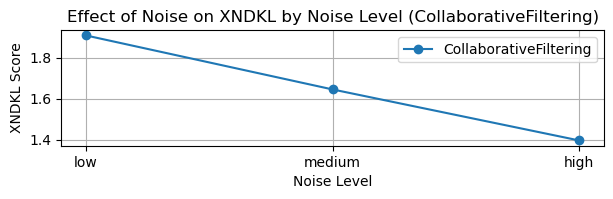

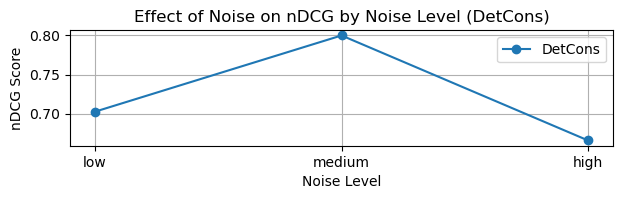

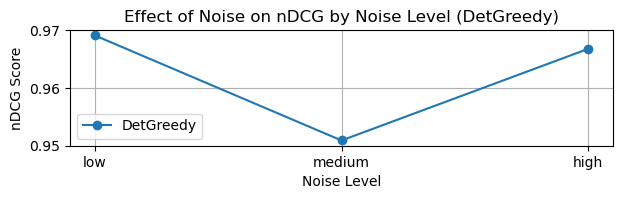

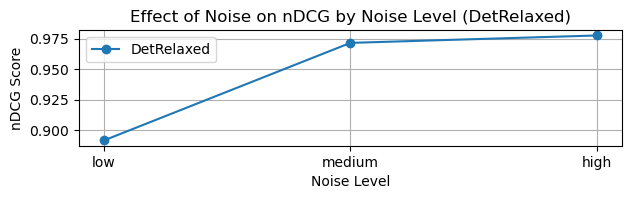

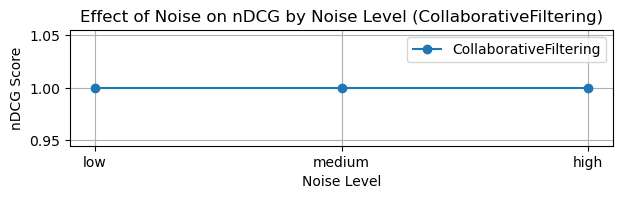

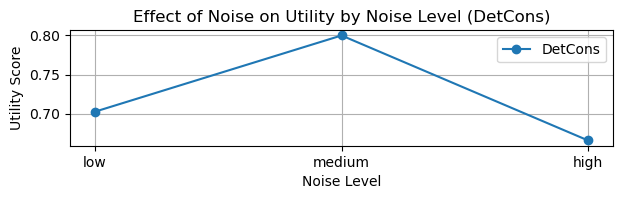

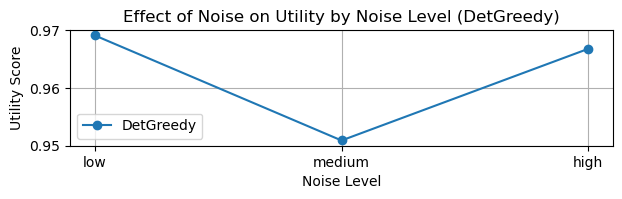

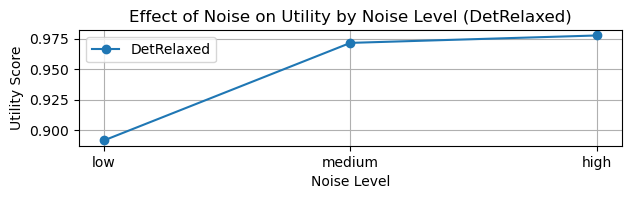

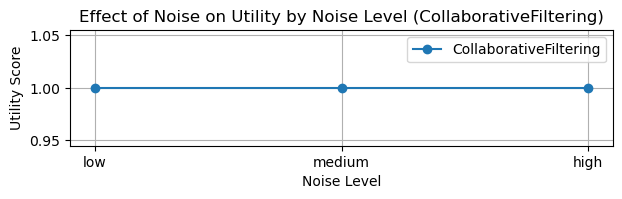

,Algorithm,Noise,NDKL_experience,NDKL_region,XNDKL,nDCG,Utility
0,DetCons,Without Noise,0.247187,0.377140,0.624326,0.734718,0.734718
1,DetGreedy,Without Noise,0.246960,0.448437,0.695397,0.981106,0.981106
2,DetRelaxed,Without Noise,0.915811,1.622588,2.538398,0.806810,0.806810
3,CollaborativeFiltering,Without Noise,0.623452,2.327537,2.950989,1.000000,1.000000
4,DetCons,With Noise (low),0.378503,0.715547,1.094050,0.702561,0.702561
5,DetGreedy,With Noise (low),0.205111,0.372174,0.750677,0.969105,0.969105
6,DetRelaxed,With Noise (low),0.818965,1.038031,2.243672,0.891687,0.891687
7,CollaborativeFiltering,With Noise (low),0.394187,1.260861,1.909222,1.000000,1.000000
8,DetCons,With Noise (medium),0.378503,0.715547,1.094050,0.799835,0.799835
9,DetGreedy,With Noise (medium),0.168524,0.349761,0.728264,0.950891,0.950891


Noisy data created for low noise level:
Regions: [11, 16, 7, 6, 0]
Experience: [1, 4, 6, 7, 7]
Noisy data created for medium noise level:
Regions: [0, 5, 0, 8, 0]
Experience: [1, 7, 5, 7, 5]
Noisy data created for high noise level:
Regions: [3, 12, 10, 5, 0]
Experience: [7, 7, 2, 5, 6]
NDKL value: 1.6071837550199242


In [1]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import random

# Φόρτωση δεδομένων από τα αρχεία CSV
users_path = "C:\\Users\\urban\\Downloads\\users.csv"
items_path = "C:\\Users\\urban\\Downloads\\items.csv"
interactions_path = "C:\\Users\\urban\\Downloads\\interactions.csv"

users_df = pd.read_csv(users_path, delimiter='\t', encoding='latin1')
items_df = pd.read_csv(items_path, delimiter='\t', encoding='latin1')
interactions_df = pd.read_csv(interactions_path, delimiter='\t', encoding='latin1')

# Μετατροπή των user_id και item_id σε string για αποφυγή προβλημάτων τύπου δεδομένων
users_df['id'] = users_df['id'].astype(str)
items_df['id'] = items_df['id'].astype(str)
interactions_df['user_id'] = interactions_df['user_id'].astype(str)
interactions_df['item_id'] = interactions_df['item_id'].astype(str)

# Δημιουργία λεξικού με disciplines ανά χρήστη και θέση εργασίας
user_disciplines = users_df[['id', 'discipline_id']].rename(columns={'id': 'user_id'})
item_disciplines = items_df[['id', 'discipline_id']].rename(columns={'id': 'item_id'})

# Συγχώνευση των αλληλεπιδράσεων με τους disciplines των χρηστών και των θέσεων εργασίας
interactions_with_disciplines = interactions_df.merge(user_disciplines, on='user_id', how='left').merge(item_disciplines, on='item_id', how='left', suffixes=('_user', '_item'))

# Φιλτράρισμα των αλληλεπιδράσεων βάσει κοινών disciplines
filtered_interactions = interactions_with_disciplines[interactions_with_disciplines['discipline_id_user'] == interactions_with_disciplines['discipline_id_item']]

# Κράτηση των πιο πρόσφατων 30000 αλληλεπιδράσεων
filtered_interactions = filtered_interactions.sort_values(by='created_at', ascending=False).head(30000)

# Υπολογισμός της συχνότητας αλληλεπιδράσεων για κάθε item
item_interaction_counts = filtered_interactions.groupby('item_id').size().reset_index(name='interaction_count')

# Εύρεση του item με τις περισσότερες αλληλεπιδράσεις
top_item = item_interaction_counts.sort_values(by='interaction_count', ascending=False).iloc[0]['item_id']

# Φιλτράρισμα για το item με τις περισσότερες αλληλεπιδράσεις
filtered_interactions_for_item = filtered_interactions[filtered_interactions['item_id'] == top_item]

# Υπολογισμός της συχνότητας αλληλεπιδράσεων για την επιλεγμένη θέση εργασίας
interaction_counts = filtered_interactions_for_item.groupby(['user_id', 'item_id']).size().reset_index(name='interaction_count')

# Συγχώνευση με τα δεδομένα χρηστών για να προστεθούν οι στήλες region και experience_years_experience
interaction_counts = interaction_counts.merge(users_df[['id', 'region', 'experience_years_experience']], left_on='user_id', right_on='id', how='left').drop(columns=['id'])

# Εκτύπωση του DataFrame για την επιλεγμένη θέση εργασίας
print(interaction_counts)

# Εμφάνιση της επιλεγμένης θέσης εργασίας
print(f"Προτάσεις για τη θέση εργασίας με item_id: {top_item}")

def rank_users_for_item(dataframe, item_id, k=180):
    # Δημιουργία πίνακα χρήστη-αντικειμένου
    user_item_matrix = dataframe.pivot(index='user_id', columns='item_id', values='interaction_count').fillna(0)
    
    # Έλεγχος εάν το item_id είναι παρόν στον πίνακα
    if item_id not in user_item_matrix.columns:
        raise ValueError(f"The item_id {item_id} is not present in the data.")
    
    # Δημιουργία υποπίνακα για τους χρήστες που έχουν αλληλεπιδράσει με το συγκεκριμένο item
    user_item_submatrix = user_item_matrix[user_item_matrix[item_id] > 0]
    
    # Υπολογισμός της ομοιότητας μεταξύ χρηστών
    similarity_matrix = cosine_similarity(user_item_submatrix.values)
    
    # Υπολογισμός μέσου όρου ομοιότητας για κάθε χρήστη
    avg_similarity_scores = np.mean(similarity_matrix, axis=1)
    
    # Δημιουργία DataFrame για τις προτάσεις
    recommendations = pd.DataFrame({
        'user_id': user_item_submatrix.index,
        'score': avg_similarity_scores
    })
    
    # Ταξινόμηση των προτάσεων κατά φθίνουσα σειρά σκορ
    recommendations = recommendations.sort_values(by='score', ascending=False).head(k)
    
    return recommendations

# Υπολογισμός των συστάσεων για το item με τις περισσότερες αλληλεπιδράσεις
df_CF_for_item = rank_users_for_item(interaction_counts, top_item)

# Εκτύπωση των αποτελεσμάτων
print(f"Προτάσεις χρηστών για τη θέση εργασίας με item_id: {top_item}")
print(df_CF_for_item)

# Unary Encoding functions
def unary_encode(response, domain):
    return [1 if d == response else 0 for d in domain]

def perturb(encoded_response, p=0.75, q=0.25):
    return [perturb_bit(b, p, q) for b in encoded_response]

def perturb_bit(bit, p=0.75, q=0.25):
    sample = np.random.random()
    if bit == 1:
        return 1 if sample <= p else 0
    else:
        return 1 if sample <= q else 0

def aggregate(responses, p=0.75, q=0.25):
    sums = np.sum(responses, axis=0)
    n = len(responses)
    return [(v - n*q) / (p-q) for v in sums]

def create_noisy_data(dataframe, attribute, domain, p, q):
    noisy_data = []
    for value in dataframe[attribute]:
        encoded = unary_encode(value, domain)
        all_zeros = True
        while all_zeros:
            noisy_encoded = perturb(encoded, p, q)
            if any(noisy_encoded):
                all_zeros = False
        indices = [i for i, value in enumerate(noisy_encoded) if value == 1]
        random_index = random.choice(indices)
        noisy_value = domain[random_index]
        if noisy_value not in domain:
            noisy_value = value
        noisy_data.append(noisy_value)
    return noisy_data

def KLD(D1, D2):
    a = np.asarray(D1, dtype=np.float64)
    b = np.asarray(D2, dtype=np.float64)
    return np.sum(np.where(a != 0, a * np.log((a + 0.00001) / (b + 0.00001)), 0))

def NDKL(df, p):
    Z = np.sum(1 / (np.log2(np.arange(1, len(df) + 1) + 1)))
    total = 0
    for i in range(1, len(df) + 1):
        value = df[:i].value_counts(normalize=True)
        value = value.to_dict()
        D1 = []
        for j in range(len(p)):
            if j in value.keys():
                D1.append(value[j])
            else:
                D1.append(0)
        total = total + (1 / np.log2(i + 1)) * np.abs(KLD(D1, p))
    return (1 / Z) * total

def compute_ndcg_simple(ranking):
    relevances = ranking
    discounts = np.array([1 / np.log2(i + 2) for i in range(len(ranking))])  # Υπολογισμός του παράγοντα εκπτώσεων

    dcg = relevances @ discounts  # Υπολογισμός DCG
    idcg = np.sort(relevances)[::-1] @ discounts  # Υπολογισμός ιδανικού DCG (iDCG)
    ndcg = dcg / idcg if idcg > 0 else 0  # Κανονικοποίηση για την απόκτηση του nDCG

    return ndcg

def compute_utility(df, user_relevances):
    recommended_items = df['score'].tolist()
    relevances = []
    for item in recommended_items:
        if len(item) == 2:
            key = item[1]  # Για περιπτώσεις όπως ['Luna45']
        else:
            key = item[3]  # Για περιπτώσεις όπως ['score', k, i, 'Luna45']
        relevances.append(user_relevances.get(key, 0))
    
    DCG = sum((rel / np.log2(idx + 2)) for idx, rel in enumerate(relevances))
    IDCG = sum((rel / np.log2(idx + 2)) for idx, rel in enumerate(sorted(relevances, reverse=True)))
    return DCG / IDCG if IDCG > 0 else 0

def calculate_under_representation(p, counts, k_max):
    min_rep = 0
    total_attributes = len(p)
    for ai in range(total_attributes):
        expected_count = k_max * p[ai]
        actual_count = counts.get(ai, 0)
        min_rep += np.sum([1 for i in range(1, k_max + 1) if actual_count < np.floor(i * p[ai])])
    return min_rep

def calculate_over_representation(p, counts, k_max):
    max_rep = 0
    total_attributes = len(p)
    for ai in range(total_attributes):
        expected_count = k_max * p[ai]
        actual_count = counts.get(ai, 0)
        max_rep += np.sum([1 for i in range(1, k_max + 1) if actual_count > np.ceil(i * p[ai])])
    return max_rep

def MinSkew(ranked_list, p):
    Z = np.sum(1 / (np.log2(np.arange(1, len(ranked_list) + 1) + 1)))
    total = 0
    for i in range(1, len(ranked_list) + 1):
        value = ranked_list[:i].value_counts(normalize=True)
        value = value.to_dict()
        D1 = []
        for j in range(len(p)):
            if j in value.keys():
                D1.append(value[j])
            else:
                D1.append(0)
        D1 = np.array(D1)
        p = np.array(p)
        total = total + (1 / np.log2(i + 1)) * np.min(np.abs(np.log((D1 + 0.00001) / (p + 0.00001))))
    return (1 / Z) * total

def MaxSkew(ranked_list, p):
    Z = np.sum(1 / (np.log2(np.arange(1, len(ranked_list) + 1) + 1)))
    total = 0
    for i in range(1, len(ranked_list) + 1):
        value = ranked_list[:i].value_counts(normalize=True)
        value = value.to_dict()
        D1 = []
        for j in range(len(p)):
            if j in value.keys():
                D1.append(value[j])
            else:
                D1.append(0)
        D1 = np.array(D1)
        p = np.array(p)
        total = total + (1 / np.log2(i + 1)) * np.max(np.abs(np.log((D1 + 0.00001) / (p + 0.00001))))
    return (1 / Z) * total

def DetCons(data, p, k_max):
    rankedAttList = []
    rankedScoreList = []
    counts = {ai: 0 for ai in range(len(p))}  # Αρχικοποίηση των μετρητών για κάθε χαρακτηριστικό
    for k in range(1, k_max + 1):
        s = {}
        for ai in counts:
            if counts[ai] < np.floor(k * p[ai]):
                key = (ai, counts[ai])
                if key in data:  # Έλεγχος εάν το κλειδί υπάρχει
                    s[ai] = data[key]
            elif counts[ai] >= np.floor(k * p[ai]) and counts[ai] < np.ceil(k * p[ai]):
                key = (ai, counts[ai])
                if key in data and ai not in s:  # Έλεγχος ύπαρξης και αποφυγή διπλού μετρήματος
                    s[ai] = data[key]
        if s:
            nextAtt = min(s, key=lambda ai: (np.ceil(k * p[ai]) - counts[ai]) / p[ai])
            rankedAttList.append(nextAtt)
            rankedScoreList.append(data[(nextAtt, counts[nextAtt])])
            counts[nextAtt] += 1
        else:
            if data:
                nextAtt = max(data, key=lambda x: data[x][0])
                rankedAttList.append(nextAtt)
                rankedScoreList.append(data[nextAtt])
                counts[nextAtt[0]] += 1
    return pd.DataFrame(list(zip(rankedAttList, rankedScoreList)), columns=['ai', 'score']), counts

def DetGreedy(data, p, k_max):
    rankedAttList = [] 
    rankedScoreList = []
    counts = {i: 0 for i in range(len(p))}
    
    for k in range(1, k_max + 1):
        belowMin = {ai for ai, v in counts.items() if v < np.floor(k * p[ai])}
        belowMax = {ai for ai, v in counts.items() if v >= np.floor(k * p[ai]) and v < np.ceil(k * p[ai])}
        s = {}
        if belowMin:
            for i in belowMin:
                if (i, counts[i]) in data:
                    s[i] = data[(i, counts[i])]
        else:
            for i in belowMax:
                if (i, counts[i]) in data:
                    s[i] = data[(i, counts[i])]
        if s:
            nextAtt = max(s, key=s.get)
            rankedAttList.append(nextAtt)
            rankedScoreList.append(data[(nextAtt, counts[nextAtt])])
            counts[nextAtt] += 1

    return pd.DataFrame(list(zip(rankedAttList, rankedScoreList)), columns=['ai', 'score']), counts

def DetRelaxed(data, p, k_max):
    rankedAttList = []
    rankedScoreList = []
    counts = {i: 0 for i in range(len(p))}

    for k in range(1, k_max + 1):
        s = {}
        for att, count in counts.items():
            if (att, count) in data:
                s[att] = data[(att, count)]
        if s:
            nextAtt = max(s, key=s.get)
            rankedAttList.append(nextAtt)
            rankedScoreList.append(s[nextAtt])
            counts[nextAtt] += 1

    return pd.DataFrame(list(zip(rankedAttList, rankedScoreList)), columns=['ai', 'score']), counts

def CollaborativeFiltering(data, k_max):
    sorted_data = sorted(data.items(), key=lambda x: x[1][0], reverse=True)
    rankedAttList = [x[0][0] for x in sorted_data[:k_max]]
    rankedScoreList = [x[1] for x in sorted_data[:k_max]]
    counts = {att: rankedAttList.count(att) for att in set(rankedAttList)}
    return pd.DataFrame(list(zip(rankedAttList, rankedScoreList)), columns=['ai', 'score']), counts

def prepare_data(dataframe):
    dataR = {}
    region = list(range(17))
    count = [0] * 17

    for j in range(len(dataframe)):
        for i in range(17):
            if dataframe["region"].iloc[j] == region[i]:
                count[i] += 1

    for i in range(17):
        if count[i] < 4:
            count[i] = 4

    for i in range(17):
        scoresgen = []
        for j in range(len(dataframe)):
            if dataframe["region"].iloc[j] == region[i]:
                score = [dataframe["interaction_count"].iloc[j], dataframe["user_id"].iloc[j] + dataframe["item_id"].iloc[j]]
                scoresgen.append(score)
        while len(scoresgen) < 4:
            score = [0.0, "unknown"]
            scoresgen.append(score)
        for j in range(min(count[i], len(scoresgen))):
            dataR[(i, j)] = scoresgen[j]

    dataE = {}
    experience = list(range(8))
    count = [0] * 8

    for j in range(len(dataframe)):
        for i in range(8):
            if dataframe["experience_years_experience"].iloc[j] == experience[i]: 
                count[i] += 1
                
    for i in range(8):
        if count[i] < 4:
            count[i] = 4
                
    for i in range(8):
        scoresgen = [] 
        for j in range(len(dataframe)):             
            if dataframe["experience_years_experience"].iloc[j] == experience[i]:                       
                score = [dataframe["interaction_count"].iloc[j], dataframe["user_id"].iloc[j] + dataframe["item_id"].iloc[j]]
                scoresgen.append(score)
        while len(scoresgen) < 4:
            score = [0.0, "unknown"]
            scoresgen.append(score)
        for j in range(min(count[i], len(scoresgen))):
            dataE[(i, j)] = scoresgen[j]

    dataRE = {}
    region = list(range(17))
    experience = list(range(8))
    count = [0] * (17 * 8)

    for j in range(len(dataframe)):   
        for k in range(17):
            for i in range(8):
                if dataframe["experience_years_experience"].iloc[j] == experience[i] and dataframe["region"].iloc[j] == region[k]:
                    count[k * 8 + i] += 1
                        
    for i in range(17 * 8):
        if count[i] < 4:
            count[i] = 4
               
    for i in range(8):
        for k in range(17):
            scoresgen = [] 
            for j in range(len(dataframe)):
                if dataframe["experience_years_experience"].iloc[j] == experience[i] and dataframe["region"].iloc[j] == region[k]:
                    score = [dataframe["interaction_count"].iloc[j], k, i, dataframe["user_id"].iloc[j] + dataframe["item_id"].iloc[j]]
                    scoresgen.append(score)
            while len(scoresgen) < 4:
                scoresgen.append([0.0, k, i, "unknown"])
            for j in range(min(count[k * 8 + i], len(scoresgen))):
                dataRE[(k * 8 + i, j)] = scoresgen[j]

    return dataR, dataE, dataRE

dataR, dataE, dataRE = prepare_data(interaction_counts)

def create_user_relevances(dataframe):
    user_relevances = {}
    for index, row in dataframe.iterrows():
        key = row['user_id'] + row['item_id']
        if key not in user_relevances or row['interaction_count'] > user_relevances[key]:
            user_relevances[key] = row['interaction_count']
    return user_relevances

user_relevances = create_user_relevances(interaction_counts)

def calculate_metrics(df, counts, p, user_relevances, attribute_name):
    metrics = {
        f'NDKL_{attribute_name}': NDKL(df['ai'], p),
        f'MinSkew_{attribute_name}': MinSkew(df['ai'], p),
        f'MaxSkew_{attribute_name}': MaxSkew(df['ai'], p),
        'nDCG': compute_ndcg_simple(df['score'].apply(lambda x: x[0])),
        'Utility': compute_utility(df, user_relevances),
        f'MinRep_{attribute_name}': calculate_under_representation(p, counts, 50),
        f'MaxRep_{attribute_name}': calculate_over_representation(p, counts, 50),
    }
    return metrics

def evaluate_noise_levels():
    P1 = [1/17] * 17  # Πιθανότητες περιοχών
    P2 = [1/8] * 8  # Πιθανότητες ομάδων εμπειρίας
    P3 = [1/(17 * 8)] * (17 * 8)  # Συνδυασμένες πιθανότητες

    noise_levels = {
        "low": (0.9, 0.1),
        "medium": (0.75, 0.25),
        "high": (0.6, 0.4)
    }

    results = {}
    for noise_label, (p, q) in noise_levels.items():
        print(f"Evaluating for noise level: {noise_label}")

        # Set the seed for reproducibility
        random.seed(42)
        np.random.seed(42)

        noisy_regions = create_noisy_data(interaction_counts, 'region', list(range(17)), p, q)
        noisy_experience = create_noisy_data(interaction_counts, 'experience_years_experience', list(range(8)), p, q)

        dataframe_noisy = pd.DataFrame({
            "region": noisy_regions,
            "experience_years_experience": noisy_experience,
            "interaction_count": interaction_counts['interaction_count'],
            "user_id": interaction_counts['user_id'],
            "item_id": interaction_counts['item_id']
        })

        dataR_noisy, dataE_noisy, dataRE_noisy = prepare_data(dataframe_noisy)
        user_relevances_noisy = create_user_relevances(dataframe_noisy)

        df_Algo2_noisy, counts_Algo2_noisy = DetCons(dataE_noisy, P2,40)
        df_Algo1_noisy, counts_Algo1_noisy = DetCons(dataR_noisy, P1,40)
        df_AlgoTotal_noisy, counts_AlgoTotal_noisy = DetCons(dataRE_noisy, P3, 40)

        metrics_Algo2_noisy = calculate_metrics(df_Algo2_noisy, counts_Algo2_noisy, P2, user_relevances_noisy, 'experience')
        metrics_Algo1_noisy = calculate_metrics(df_Algo1_noisy, counts_Algo1_noisy, P1, user_relevances_noisy, 'region')
        metrics_AlgoTotal_noisy = calculate_metrics(df_AlgoTotal_noisy, counts_AlgoTotal_noisy, P3, user_relevances_noisy, 'combined')

        ndkl_Algo1_noisy = metrics_Algo1_noisy[f'NDKL_region']
        ndkl_Algo2_noisy = metrics_Algo2_noisy[f'NDKL_experience']
        XNDKL_noisy = ndkl_Algo1_noisy + ndkl_Algo2_noisy

        results[noise_label] = {
            'DetCons': {
                **metrics_Algo2_noisy,
                **metrics_Algo1_noisy,
                **metrics_AlgoTotal_noisy,
                'XNDKL': XNDKL_noisy
            },
            'DetGreedy': {
                **calculate_metrics(*DetGreedy(dataE_noisy, P2, 140), P2, user_relevances_noisy, 'experience'),
                **calculate_metrics(*DetGreedy(dataR_noisy, P1,140), P1, user_relevances_noisy, 'region'),
                **calculate_metrics(*DetGreedy(dataRE_noisy, P3, 140), P3, user_relevances_noisy, 'combined'),
                'XNDKL': calculate_metrics(*DetGreedy(dataR_noisy, P1, 140), P1, user_relevances_noisy, 'region')[f'NDKL_region'] + calculate_metrics(*DetGreedy(dataE_noisy, P2, 40), P2, user_relevances_noisy, 'experience')[f'NDKL_experience']
            },
            'DetRelaxed': {
                **calculate_metrics(*DetRelaxed(dataE_noisy, P2, 140), P2, user_relevances_noisy, 'experience'),
                **calculate_metrics(*DetRelaxed(dataR_noisy, P1, 140), P1, user_relevances_noisy, 'region'),
                **calculate_metrics(*DetRelaxed(dataRE_noisy, P3, 140), P3, user_relevances_noisy, 'combined'),
                'XNDKL': calculate_metrics(*DetRelaxed(dataR_noisy, P1, 140), P1, user_relevances_noisy, 'region')[f'NDKL_region'] + calculate_metrics(*DetRelaxed(dataE_noisy, P2, 40), P2, user_relevances_noisy, 'experience')[f'NDKL_experience']
            },
            'CollaborativeFiltering': {
                **calculate_metrics(*CollaborativeFiltering(dataE_noisy, 140), P2, user_relevances_noisy, 'experience'),
                **calculate_metrics(*CollaborativeFiltering(dataR_noisy, 140), P1, user_relevances_noisy, 'region'),
                **calculate_metrics(*CollaborativeFiltering(dataRE_noisy, 140), P3, user_relevances_noisy, 'combined'),
                'XNDKL': calculate_metrics(*CollaborativeFiltering(dataR_noisy, 140), P1, user_relevances_noisy, 'region')[f'NDKL_region'] + calculate_metrics(*CollaborativeFiltering(dataE_noisy, 40), P2, user_relevances_noisy, 'experience')[f'NDKL_experience']
            }
        }
    return results

def calculate_all_metrics():
    P1 = [1/17] * 17  # Πιθανότητες περιοχών
    P2 = [1/8] * 8  # Πιθανότητες ομάδων εμπειρίας
    P3 = [1/(17 * 8)] * (17 * 8)  # Συνδυασμένες πιθανότητες

    # Υπολογισμός μετρικών για DetCons χωρίς Randomized Response
    df_Algo2, counts_Algo2 = DetCons(dataE, P2, 140)
    df_Algo1, counts_Algo1 = DetCons(dataR, P1, 140)
    df_AlgoTotal, counts_AlgoTotal = DetCons(dataRE, P3, 140)

    # Υπολογισμός μετρικών για DetGreedy χωρίς Randomized Response
    df_Algo2_Greedy, counts_Algo2_Greedy = DetGreedy(dataE, P2, 140)
    df_Algo1_Greedy, counts_Algo1_Greedy = DetGreedy(dataR, P1, 140)
    df_AlgoTotal_Greedy, counts_AlgoTotal_Greedy = DetGreedy(dataRE, P3, 140)

    # Υπολογισμός μετρικών για DetRelaxed χωρίς Randomized Response
    df_Algo2_Relaxed, counts_Algo2_Relaxed = DetRelaxed(dataE, P2, 140)
    df_Algo1_Relaxed, counts_Algo1_Relaxed = DetRelaxed(dataR, P1, 140)
    df_AlgoTotal_Relaxed, counts_AlgoTotal_Relaxed = DetRelaxed(dataRE, P3, 140)

    # Υπολογισμός μετρικών για Collaborative Filtering χωρίς Randomized Response
    df_Algo2_CF, counts_Algo2_CF = CollaborativeFiltering(dataE, 140)
    df_Algo1_CF, counts_Algo1_CF = CollaborativeFiltering(dataR, 140)
    df_Algo_CF, counts_Algo_CF = CollaborativeFiltering(dataRE,140)

    # Υπολογισμός των μετρικών για κάθε αλγόριθμο και κάθε σύνολο δεδομένων
    results_without_noise = {
        'DetCons': {
            **calculate_metrics(df_Algo2, counts_Algo2, P2, user_relevances, 'experience'),
            **calculate_metrics(df_Algo1, counts_Algo1, P1, user_relevances, 'region'),
            **calculate_metrics(df_AlgoTotal, counts_AlgoTotal, P3, user_relevances, 'combined'),
            'XNDKL': NDKL(df_Algo1['ai'], P1) + NDKL(df_Algo2['ai'], P2)
        },
        'DetGreedy': {
            **calculate_metrics(df_Algo2_Greedy, counts_Algo2_Greedy, P2, user_relevances, 'experience'),
            **calculate_metrics(df_Algo1_Greedy, counts_Algo1_Greedy, P1, user_relevances, 'region'),
            **calculate_metrics(df_AlgoTotal_Greedy, counts_AlgoTotal_Greedy, P3, user_relevances, 'combined'),
            'XNDKL': NDKL(df_Algo1_Greedy['ai'], P1) + NDKL(df_Algo2_Greedy['ai'], P2)
        },
        'DetRelaxed': {
            **calculate_metrics(df_Algo2_Relaxed, counts_Algo2_Relaxed, P2, user_relevances, 'experience'),
            **calculate_metrics(df_Algo1_Relaxed, counts_Algo1_Relaxed, P1, user_relevances, 'region'),
            **calculate_metrics(df_AlgoTotal_Relaxed, counts_AlgoTotal_Relaxed, P3, user_relevances, 'combined'),
            'XNDKL': NDKL(df_Algo1_Relaxed['ai'], P1) + NDKL(df_Algo2_Relaxed['ai'], P2)
        },
        'CollaborativeFiltering': {
            **calculate_metrics(df_Algo2_CF, counts_Algo2_CF, P2, user_relevances, 'experience'),
            **calculate_metrics(df_Algo1_CF, counts_Algo1_CF, P1, user_relevances, 'region'),
            **calculate_metrics(df_Algo_CF, counts_Algo_CF, P3, user_relevances, 'combined'),
            'XNDKL': NDKL(df_Algo1_CF['ai'], P1) + NDKL(df_Algo2_CF['ai'], P2)
        }
    }
    return results_without_noise

# Υπολογισμός και εκτύπωση όλων των μετρικών χωρίς θόρυβο
results_without_noise = calculate_all_metrics()

for algo, metrics in results_without_noise.items():
    print(f"\nResults for {algo} without noise")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")

def extract_values_by_algorithm(results, metric):
    return [results[algo][metric] for algo in results.keys()]

algorithms = list(results_without_noise.keys())
metrics_to_plot = ['NDKL_experience', 'NDKL_region', 'XNDKL', 'nDCG', 'Utility',]

for metric in metrics_to_plot:
    values = extract_values_by_algorithm(results_without_noise, metric)
    plt.figure(figsize=(7, 1.5))
    plt.bar(algorithms, values, color='b')
    plt.xlabel('Algorithm')
    plt.ylabel(f'{metric} Score')
    plt.title(f'Comparison of {metric} Scores by Algorithm (without noise)')
    plt.grid(True)
    plt.show()

results_with_noise = evaluate_noise_levels()

for noise_label, metrics in results_with_noise.items():
    print(f"\nResults for noise level = {noise_label}")
    for metric, algo_metrics in metrics.items():
        print(f"{metric}:")
        for algo_metric, value in algo_metrics.items():
            print(f"  {algo_metric}: {value}")

def extract_values_by_noise_level(metric, results, algo):
    return [results[noise_level][algo][metric] for noise_level in results.keys()]

for metric in metrics_to_plot:
    for algo in algorithms:
        values = extract_values_by_noise_level(metric, results_with_noise, algo)
        plt.figure(figsize=(7, 1.5))
        plt.plot(list(results_with_noise.keys()), values, marker='o', label=algo)
        plt.xlabel('Noise Level')
        plt.ylabel(f'{metric} Score')
        plt.title(f'Effect of Noise on {metric} by Noise Level ({algo})')
        plt.grid(True)
        plt.legend()
        plt.show()

def prepare_results_dataframe(results, noise_label):
    data = []
    for algo, metrics in results.items():
        row = [algo]
        for metric in metrics_to_plot:
            row.append(metrics.get(metric, np.nan))
        data.append(row)
    
    columns = ['Algorithm'] + metrics_to_plot
    df = pd.DataFrame(data, columns=columns)
    df['Noise'] = noise_label
    return df

df_without_noise = prepare_results_dataframe(results_without_noise, 'Without Noise')
df_with_noise = pd.concat([prepare_results_dataframe(results_with_noise[noise_label], f'With Noise ({noise_label})') for noise_label in results_with_noise.keys()], ignore_index=True)

df_combined = pd.concat([df_without_noise, df_with_noise], ignore_index=True)

# Μετακίνηση της στήλης Noise μετά τη στήλη Algorithm
noise_column = df_combined.pop('Noise')
df_combined.insert(1, 'Noise', noise_column)

# Εμφάνιση του συνδυασμένου DataFrame
display(df_combined)

# Επαλήθευση δημιουργίας δεδομένων με θόρυβο
def verify_noisy_data_creation(interaction_counts):
    noise_levels = {
        "low": (0.9, 0.1),
        "medium": (0.75, 0.25),
        "high": (0.6, 0.4)
    }
    for noise_label, (p, q) in noise_levels.items():
        noisy_regions = create_noisy_data(interaction_counts, 'region', list(range(17)), p, q)
        noisy_experience = create_noisy_data(interaction_counts, 'experience_years_experience', list(range(8)), p, q)
        print(f"Noisy data created for {noise_label} noise level:")
        print(f"Regions: {noisy_regions[:5]}")
        print(f"Experience: {noisy_experience[:5]}")

# Κλήση της συνάρτησης επαλήθευσης
verify_noisy_data_creation(interaction_counts)

# Επαλήθευση της συνάρτησης NDKL
def verify_ndkl_calculation(df, p):
    ndkl_value = NDKL(df['ai'], p)
    print(f"NDKL value: {ndkl_value}")

# Δημιουργία δεδομένων για τον έλεγχο
df_test, counts_test = DetRelaxed(dataR, [1/17]*17, 180)
verify_ndkl_calculation(df_test, [1/17]*17)
